In [81]:
##### SCIKIT-LEARN or SKLEARN #####
#
#  - Python Machine Learning Module
#  - Simple and efficient tools for data mining and data analysis
#  - Accessible to everybody, and reusable in various contexts
#  - Built on NumPy, SciPy, and matplotlib
#  - Open source, commercially usable - BSD license
#
# https://scikit-learn.org/stable/index.html
# https://scikit-learn.org/stable/user_guide.html 
# https://scikit-learn.org/stable/modules/classes.html
# https://scikit-learn.org/stable/auto_examples/

In [82]:
# The sklearn ML API is very consistent:
# 0) read data
# 1) explore data
# 2) preprocess data
# 3) setup data for consumption by ML model 
#     4) choose the model by importing the appropriate estiamtor class from sklearn [from sklearn import model]
#     5) instantiate the model with desired parameter values [ml=model()]
#     6) fit the model to the training data [ml.fit(Xtrain, ytrain)]
#     7) apply the model to test data [ypred=ml.predict(Xtest) or ml.transform(Xtest)]
# 8) evaluate model
# 9) deploy/use model

In [83]:
import pandas as pd
import numpy as np

In [84]:
##### Logistic Regression
#
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
#
 
# 0) read data
from sklearn.datasets import load_iris
dataset = load_iris()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['label'] = dataset.target
df.head()

# 1) explore data
# not demonstrating for this example

# 2) preprocess data
# not demonstrating for this example

# 3) setup data for ml model
X = df.drop(['label'], axis=1)
y = df['label']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# 4-7) import, instantiate, train, test model
from sklearn.linear_model import LogisticRegression                                                                   # 4) choose the model 
lr = LogisticRegression(C=1e5, solver='lbfgs', multi_class='auto', class_weight=None)                # 5) instantiate the model 
lr.fit(X_train, y_train)                                                                                                                         # 6) fit the model to train data
y_pred = lr.predict(X_test)                                                                                                                # 7) apply model to test data 

# 8) evaluate model
# https://scikit-learn.org/stable/modules/model_evaluation.html
from sklearn import metrics
print (metrics.accuracy_score(y_test, y_pred))
print (metrics.confusion_matrix(y_test, y_pred))
print (metrics.classification_report(y_test, y_pred))

1.0
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



1.0
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



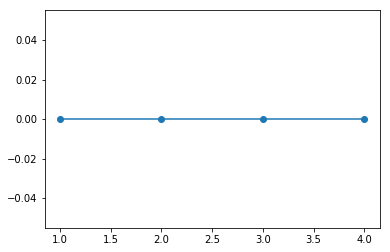

In [85]:
##### KNN Classification
#
# https://scikit-learn.org/stable/modules/neighbors.html
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
#

# 0) read data
from sklearn.datasets import load_iris
dataset = load_iris()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['label'] = dataset.target
df.head()

# 1) explore data
# not demonstrating for this example

# 2) preprocess data
# not demonstrating for this example

# 3) setup data for ml model
X = df.drop(['label'], axis=1)
y = df['label']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# 4-7) import, instantiate, train, test model
from sklearn.neighbors import KNeighborsClassifier                                                            
# simple majority vote (weights='uniform') of 5 nearest neighbors (n_neighbors=5) based on euclidean distance (p=2, metric='minkowski')
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', p=2, metric='minkowski') 
knn.fit(X_train, y_train)                                                                                                            
y_pred = knn.predict(X_test)                                                                                                  

# 8) evaluate model
# https://scikit-learn.org/stable/modules/model_evaluation.html
from sklearn import metrics
print (metrics.accuracy_score(y_test, y_pred))
print (metrics.confusion_matrix(y_test, y_pred))
print (metrics.classification_report(y_test, y_pred))

# Note, we can use the "elbow method" to pick an optimal k 
from sklearn import metrics
import matplotlib.pyplot as plt
errorlst = pd.DataFrame(data=None, columns=['k','error'])
for k in range(1,5):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error = metrics.mean_absolute_error (y_test, y_pred)
    errorlst = errorlst.append ({'k':k, 'error':error}, ignore_index=True)
plt.plot (errorlst['k'], errorlst['error'], 'o-')

In [86]:
##### SVM Classification
# 
# https://scikit-learn.org/stable/modules/svm.html
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# https://scikit-learn.org/stable/modules/svm.html#svm-kernels
#

# 0) read data
from sklearn.datasets import load_iris
dataset = load_iris()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['label'] = dataset.target
df.head()

# 1) explore data
# not demonstrating for this example

# 2) preprocess data
# not demonstrating for this example

# 3) setup data for ml model
X = df.drop(['label'], axis=1)
y = df['label']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# 4-7) import, instantiate, train, test model
from sklearn.svm import SVC                                          
svc = SVC(C=1.0, kernel='linear', class_weight=None)     
# svc = SVC(C=1.0, kernel='rbf', gamma=0.7)
# svc = SVC(C=1.0, kernel='poly', degree=3)
svc.fit(X_train, y_train)                                                        
y_pred = svc.predict(X_test)                                               

# 8) evaluate model
# https://scikit-learn.org/stable/modules/model_evaluation.html
from sklearn import metrics
print (metrics.accuracy_score(y_test, y_pred))
print (metrics.confusion_matrix(y_test, y_pred))
print (metrics.classification_report(y_test, y_pred))

1.0
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [87]:
##### Naive Bayes Classification
#
# https://scikit-learn.org/stable/modules/naive_bayes.html
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html
#

# 0) read data
from sklearn.datasets import load_iris
dataset = load_iris()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['label'] = dataset.target
df.head()

# 1) explore data
# not demonstrating for this example

# 2) preprocess data
# not demonstrating for this example

# 3) setup data for ml model
X = df.drop(['label'], axis=1)
y = df['label']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# 4-7) import, instantiate, train, test model
from sklearn.naive_bayes import GaussianNB            
nb = GaussianNB()                                                       
# from sklearn.naive_bayes import MultinomialNB
# nb = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
# from sklearn.naive_bayes import BernoulliNB
# nb = BernoulliNB()
nb.fit(X_train, y_train)                                                   
y_pred = nb.predict(X_test)                                         

# 8) evaluate model
# https://scikit-learn.org/stable/modules/model_evaluation.html
from sklearn import metrics
print (metrics.accuracy_score(y_test, y_pred))
print (metrics.confusion_matrix(y_test, y_pred))
print (metrics.classification_report(y_test, y_pred))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

   micro avg       0.97      0.97      0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [88]:
##### Decision Tree Classification
#
# https://scikit-learn.org/stable/modules/tree.html
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
#

# 0) read data
from sklearn.datasets import load_iris
dataset = load_iris()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['label'] = dataset.target
df.head()

# 1) explore data
# not demonstrating for this example

# 2) preprocess data
# not demonstrating for this example

# 3) setup data for ml model
X = df.drop(['label'], axis=1)
y = df['label']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# 4-7) import, instantiate, train, test model
from sklearn.tree import DecisionTreeClassifier            
dt = DecisionTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=1, class_weight=None)                                           
dt.fit(X_train, y_train)                                                       
y_pred = dt.predict(X_test)                                             

# 8) evaluate model
# https://scikit-learn.org/stable/modules/model_evaluation.html
from sklearn import metrics
print (metrics.accuracy_score(y_test, y_pred))
print (metrics.confusion_matrix(y_test, y_pred))
print (metrics.classification_report(y_test, y_pred))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

   micro avg       0.97      0.97      0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

